In [48]:
!pip install pyspark

In [49]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [50]:
import findspark
findspark.init()
import pyspark
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *

In [51]:
df = spark.read.csv("spotify.csv", inferSchema = True, header = True)

In [52]:
print(df.columns)

['_c0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [53]:
df.show()

+---+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|_c0|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|
+---+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|  0|5SuOikwiRyPMVoIQD...|         Gen Hoshino|              Comedy|              Comedy|        73|     230666|   False|       0.676| 0.461|  1|  -6.746|   0|      0.143|      0.0322|         1.01E-6|   0.358|  0.715| 87.917|           4

In [54]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- track_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- album_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- explicit: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- key: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- track_genre: string (nullable = true)



In [55]:
# Check for missing values
missing_values = {col: df.filter(df[col].isNull()).count() for col in df.columns}
for col, count in missing_values.items():
    print(f"Missing values in '{col}': {count}")


Missing values in '_c0': 0
Missing values in 'track_id': 0
Missing values in 'artists': 1
Missing values in 'album_name': 1
Missing values in 'track_name': 1
Missing values in 'popularity': 0
Missing values in 'duration_ms': 0
Missing values in 'explicit': 0
Missing values in 'danceability': 0
Missing values in 'energy': 0
Missing values in 'key': 0
Missing values in 'loudness': 0
Missing values in 'mode': 0
Missing values in 'speechiness': 0
Missing values in 'acousticness': 0
Missing values in 'instrumentalness': 0
Missing values in 'liveness': 0
Missing values in 'valence': 0
Missing values in 'tempo': 0
Missing values in 'time_signature': 0
Missing values in 'track_genre': 0


In [56]:
from pyspark.sql.functions import mean, when, col

# Assuming df is your DataFrame
# Replace df with your actual DataFrame variable

# Replace missing values in 'artists', 'album_name', 'track_name' with 'Unknown'
df = df.na.fill({'artists': 'Unknown', 'album_name': 'Unknown', 'track_name': 'Unknown'})

# Convert columns with numeric values to their appropriate data types
df = df.withColumn('popularity', col('popularity').cast('int'))
df = df.withColumn('duration_ms', col('duration_ms').cast('int'))
df = df.withColumn('explicit', col('explicit').cast('boolean'))
df = df.withColumn('danceability', col('danceability').cast('double'))
df = df.withColumn('energy', col('energy').cast('double'))
df = df.withColumn('key', col('key').cast('int'))
df = df.withColumn('loudness', col('loudness').cast('double'))
df = df.withColumn('mode', col('mode').cast('int'))
df = df.withColumn('speechiness', col('speechiness').cast('double'))
df = df.withColumn('acousticness', col('acousticness').cast('double'))
df = df.withColumn('instrumentalness', col('instrumentalness').cast('double'))
df = df.withColumn('liveness', col('liveness').cast('double'))
df = df.withColumn('valence', col('valence').cast('double'))
df = df.withColumn('tempo', col('tempo').cast('double'))
df = df.withColumn('time_signature', col('time_signature').cast('int'))

# Displaying the updated DataFrame
df.show()


+---+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|_c0|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|
+---+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|  0|5SuOikwiRyPMVoIQD...|         Gen Hoshino|              Comedy|              Comedy|        73|     230666|   false|       0.676| 0.461|  1|  -6.746|   0|      0.143|      0.0322|         1.01E-6|   0.358|  0.715| 87.917|            

In [57]:
#Summary Statistics:

df.describe().show()

+-------+-----------------+--------------------+-----------------+----------------------------+--------------+------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+------------------+-------------------+------------------+-----------------+-------------------+------------------+------------------+------------------+
|summary|              _c0|            track_id|          artists|                  album_name|    track_name|        popularity|       duration_ms|      danceability|           energy|               key|           loudness|              mode|       speechiness|       acousticness|  instrumentalness|         liveness|            valence|             tempo|    time_signature|       track_genre|
+-------+-----------------+--------------------+-----------------+----------------------------+--------------+------------------+------------------+------------------+-----------------+------------------+--

In [58]:
#Count of Unique Values:

for col_name in ['artists', 'album_name', 'track_name', 'track_genre']:
    unique_values_count = df.select(col_name).distinct().count()
    print(f"Unique values count in {col_name}: {unique_values_count}")

Unique values count in artists: 31438
Unique values count in album_name: 46590
Unique values count in track_name: 73590
Unique values count in track_genre: 152


In [59]:
#Correlation Analysis:
#we calculate the degree to which two variables are linearly related to each other. The result is a correlation coefficient that indicates the strength and direction of the linear relationship between the variables. The correlation coefficient ranges from -1 to 1, where:
#1: Perfect positive correlation
#0: No correlation
#-1: Perfect negative correlation

correlation_matrix = df.select([col(c).cast('float') for c in df.columns]).toPandas().corr()
print(correlation_matrix)

                       _c0  track_id   artists  album_name  track_name  \
_c0               1.000000       NaN -0.149599   -0.058473   -0.100880   
track_id               NaN       NaN       NaN         NaN         NaN   
artists          -0.149599       NaN  1.000000         NaN         NaN   
album_name       -0.058473       NaN       NaN    1.000000    0.999951   
track_name       -0.100880       NaN       NaN    0.999951    1.000000   
popularity        0.031887       NaN  0.425056   -0.027002    0.003634   
duration_ms      -0.032482       NaN  0.123258    0.047102    0.105399   
explicit         -0.054799       NaN -0.047828   -0.027725   -0.044389   
danceability     -0.002050       NaN  0.238385   -0.028472   -0.023447   
energy            0.002476       NaN -0.397308    0.037547    0.032156   
key               0.001703       NaN  0.036043   -0.051934   -0.076359   
loudness         -0.001821       NaN -0.471646   -0.032382   -0.065125   
mode              0.001747       NaN  

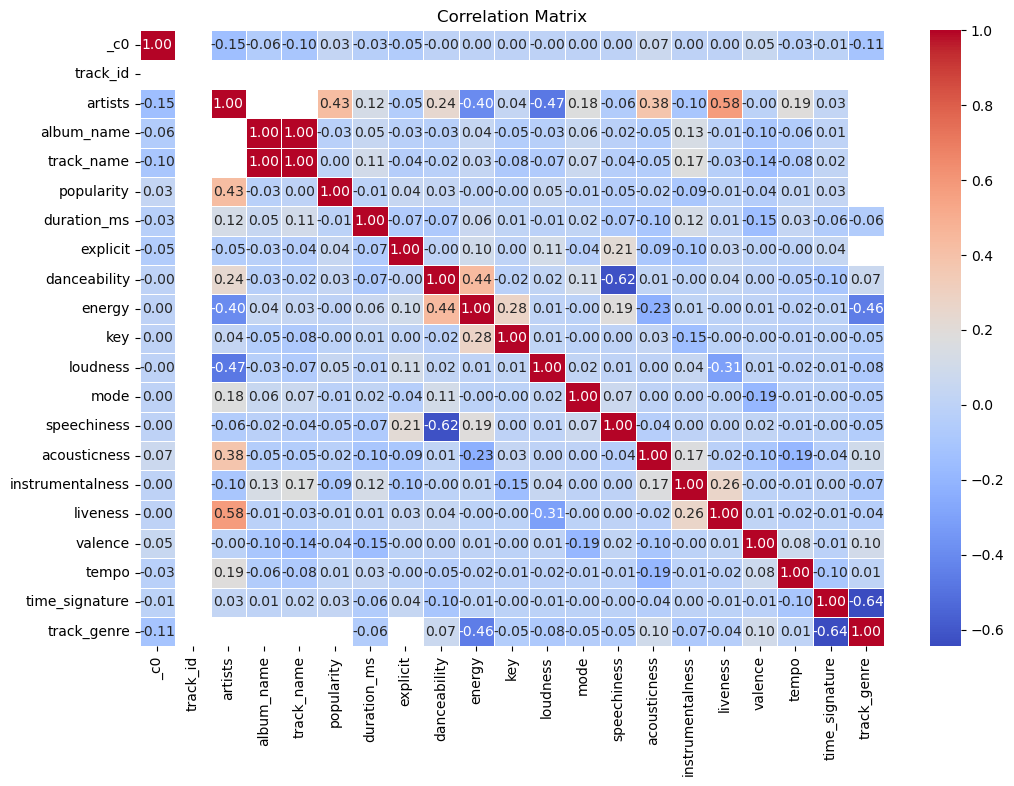

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is your computed correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [61]:
#Popular Genres:

popular_genres = df.groupBy('track_genre').agg({'popularity': 'mean'}).orderBy('avg(popularity)', ascending=False)
popular_genres.show()

+-----------------+------------------+
|      track_genre|   avg(popularity)|
+-----------------+------------------+
|         pop-film|59.287575150300604|
|            k-pop|            56.896|
|            chill|            53.651|
|              sad|            52.379|
|           grunge|            49.594|
|           indian|            49.539|
|            anime|            48.772|
|              emo|            48.128|
|        sertanejo|            47.866|
|              pop|            47.576|
|progressive-house|            46.615|
|            piano|            45.273|
|         mandopop|            45.025|
|       deep-house|            44.808|
|           brazil|             44.67|
|       electronic|            44.325|
|           pagode|            44.298|
|          ambient|            44.191|
|          british| 43.88264794383149|
|            metal|            43.705|
+-----------------+------------------+
only showing top 20 rows



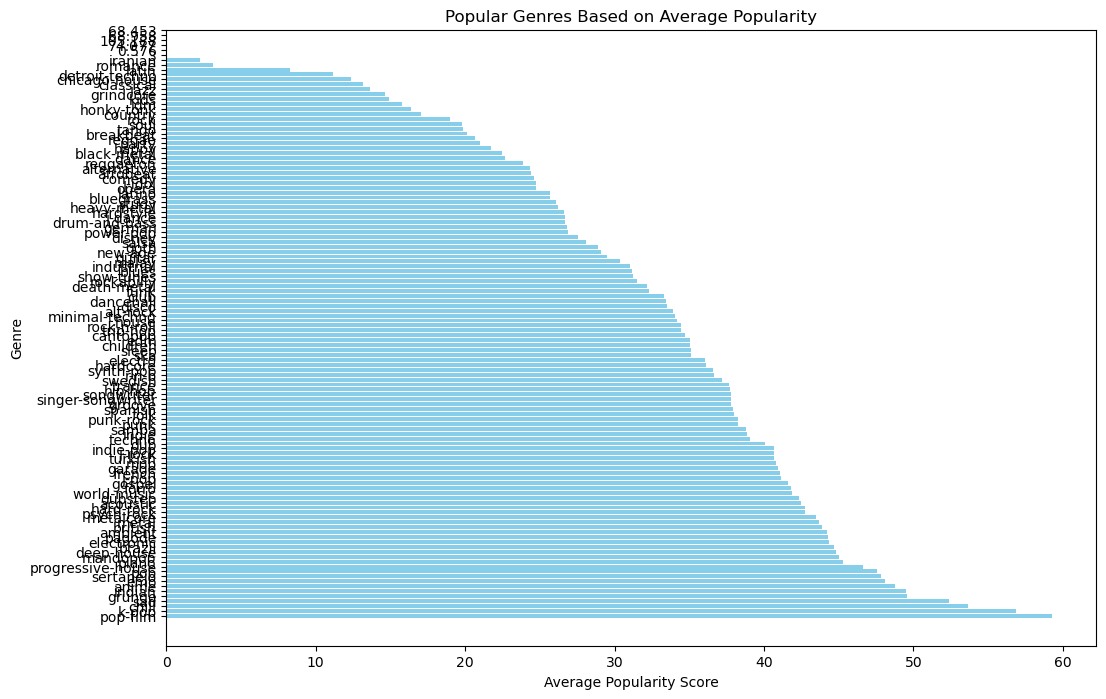

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming popular_genres is your computed DataFrame
popular_genres_list = popular_genres.collect()

# Convert to Pandas DataFrame
popular_genres_pd = pd.DataFrame(popular_genres_list, columns=['track_genre', 'avg(popularity)'])

plt.figure(figsize=(12, 8))
plt.barh(popular_genres_pd['track_genre'], popular_genres_pd['avg(popularity)'], color='skyblue')
plt.xlabel('Average Popularity Score')
plt.ylabel('Genre')
plt.title('Popular Genres Based on Average Popularity')
plt.show()

In [63]:
#Duration Analysis:
df = df.withColumn('duration_min', col('duration_ms') / 60000)

df.show()

duration_stats = df.select('duration_min').describe().toPandas()
print(duration_stats)

+---+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+------------------+
|_c0|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|      duration_min|
+---+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+------------------+
|  0|5SuOikwiRyPMVoIQD...|         Gen Hoshino|              Comedy|              Comedy|        73|     230666|   false|       0.676| 0.461|  1|  -6.746|   0|      0.143|      0.03

+---+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+------------------+
|_c0|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|      duration_min|
+---+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+------------------+
|  0|5SuOikwiRyPMVoIQD...|         Gen Hoshino|              Comedy|              Comedy|        73|     230666|   false|       0.676| 0.461|  1|  -6.746|   0|      0.143|      0.03

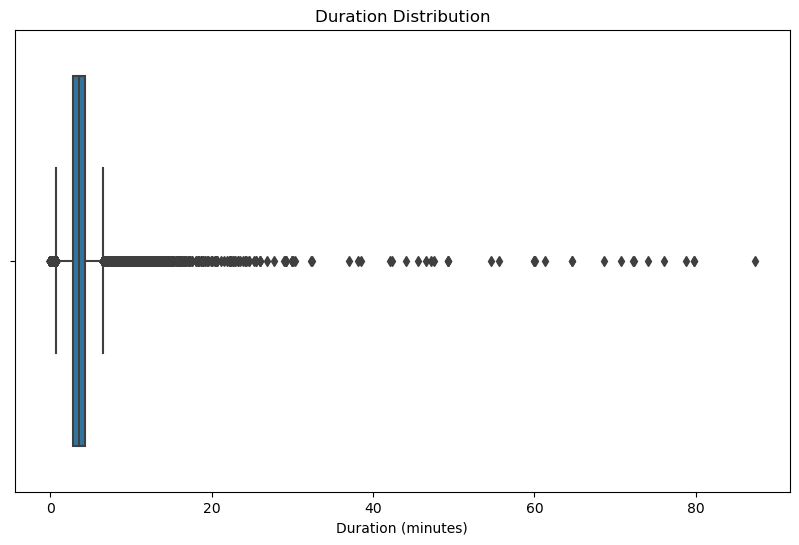

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
df = df.withColumn('duration_min', col('duration_ms') / 60000)

# Displaying the DataFrame after adding the 'duration_min' column
df.show()

# Calculate and display duration statistics
duration_stats = df.select('duration_min').describe().toPandas()
print(duration_stats)

# Visualizing the duration distribution using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.select('duration_min').toPandas()['duration_min'])
plt.title('Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.show()

In [65]:
#Explicit vs Non-Explicit:
#Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

explicit_vs_nonexplicit = df.groupBy('explicit').agg({'popularity': 'mean'})
explicit_vs_nonexplicit.show()

+--------+-----------------+
|explicit|  avg(popularity)|
+--------+-----------------+
|    NULL|             NULL|
|    true| 36.4541910331384|
|   false|32.95822088187555|
+--------+-----------------+



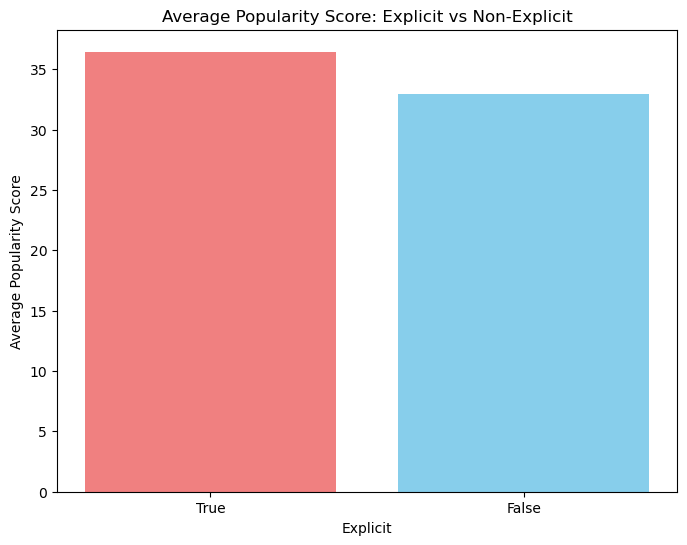

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming explicit_vs_nonexplicit is your computed DataFrame
explicit_vs_nonexplicit_list = explicit_vs_nonexplicit.collect()

# Convert to Pandas DataFrame
explicit_vs_nonexplicit_pd = pd.DataFrame(explicit_vs_nonexplicit_list, columns=['explicit', 'avg(popularity)'])

# Visualize using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(explicit_vs_nonexplicit_pd['explicit'].astype(str), explicit_vs_nonexplicit_pd['avg(popularity)'], color=['skyblue', 'lightcoral'])
plt.xlabel('Explicit')
plt.ylabel('Average Popularity Score')
plt.title('Average Popularity Score: Explicit vs Non-Explicit')
plt.show()

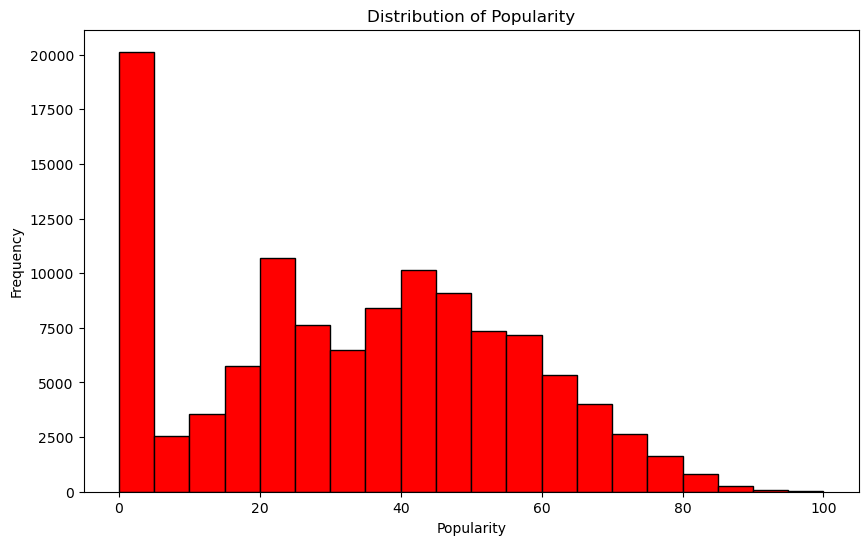

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
# Replace df with your actual DataFrame variable

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Plotting the distribution of 'popularity'
plt.figure(figsize=(10, 6))
plt.hist(pandas_df['popularity'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [68]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Assuming spark is your SparkSession and df is your DataFrame
# Replace spark and df with your actual SparkSession and DataFrame variable

# Complex condition: Filtering tracks with popularity greater than 70, energy greater than 0.8, and explicit is True
filtered_df = df.filter((col('popularity') > 70) & (col('energy') > 0.8) & (col('explicit') == True))

# Displaying the filtered DataFrame
filtered_df.show()


+----+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+------------------+
| _c0|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|      duration_min|
+----+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+------------------+
|1100|1q8NdCAQ9QUjpYiqz...|            Calle 13|Calle 13 (Explici...|      Atrévete-Te-Te|        75|     239306|    true|       0.829| 0.878|  9|  -5.951|   1|      0.101|      

In [69]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

# Assuming spark is your SparkSession and df is your DataFrame
# Replace spark and df with your actual SparkSession and DataFrame variable

# Group by 'artists' and calculate the average 'duration_ms'
average_duration_df = df.groupBy('artists').agg(avg('duration_ms').alias('avg_duration_ms'))

# Filter the results based on a condition (e.g., artists with average duration greater than a threshold)
threshold_duration = 300000  # Set your threshold value as needed
filtered_results = average_duration_df.filter(col('avg_duration_ms') > threshold_duration)

# Displaying the results
filtered_results.show()


+--------------------+------------------+
|             artists|   avg_duration_ms|
+--------------------+------------------+
|       Baobinga;I.D.|          380400.0|
|Johann Sebastian ...|          363253.0|
|David Guetta;Chri...|          377013.0|
|Lafayette Afro Ro...|          319322.5|
|Bethel Music;Davi...| 529996.6666666666|
|Bethel Music;Jenn...|          342259.0|
|             Dhamika|          472000.0|
|     Galileo Galilei|317260.85714285716|
|           Body Void|          395035.0|
|           Belzebubs|          378733.0|
|       André Valadão|324773.55555555556|
|Stanton Warriors;...|          374523.0|
|    Roy Davis Jr.;XL|          357725.0|
|Monophonics;Kelly...|          367906.5|
|          Ebo Taylor|          313142.5|
|Månegarm;Lea Graw...|          335120.0|
|              Kemuel| 317917.4561403509|
|Missionário Shalo...|          313133.0|
|Paul Johnson;Ange...|          518559.0|
|Pandit Jasraj;Bha...|          325307.0|
+--------------------+------------

In [70]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, min, max, count

# Create a Spark session
spark = SparkSession.builder.appName("BasicDataAnalysis").getOrCreate()

# Assuming df is your DataFrame
# Replace df with your actual DataFrame variable

# Display the schema of the DataFrame
df.printSchema()

# Display the first few rows of the DataFrame
df.show(5)

# Summary statistics for numerical columns
numerical_summary = df.describe(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness'])
numerical_summary.show()

# Count the number of distinct values in each column
distinct_counts = df.agg(*(count(col(c)).alias(c + "_distinct") for c in df.columns))
distinct_counts.show()

# Calculate the mean, min, and max values for 'duration_ms' and 'popularity'
duration_stats = df.select(mean('duration_ms'), min('duration_ms'), max('duration_ms')).collect()
popularity_stats = df.select(mean('popularity'), min('popularity'), max('popularity')).collect()

print(f"Average Duration (ms): {duration_stats[0][0]}")
print(f"Minimum Duration (ms): {duration_stats[0][1]}")
print(f"Maximum Duration (ms): {duration_stats[0][2]}")

print(f"Average Popularity: {popularity_stats[0][0]}")
print(f"Minimum Popularity: {popularity_stats[0][1]}")
print(f"Maximum Popularity: {popularity_stats[0][2]}")

# Correlation between 'danceability' and 'energy'
correlation = df.stat.corr('danceability', 'energy')
print(f"Correlation between Danceability and Energy: {correlation}")

# Display unique values in the 'explicit' column
unique_explicit_values = df.select('explicit').distinct().collect()
print("Unique Explicit Values:", [row['explicit'] for row in unique_explicit_values])

# ... Perform additional analysis based on your specific needs

# Stop the Spark session
spark.stop()


root
 |-- _c0: integer (nullable = true)
 |-- track_id: string (nullable = true)
 |-- artists: string (nullable = false)
 |-- album_name: string (nullable = false)
 |-- track_name: string (nullable = false)
 |-- popularity: integer (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: integer (nullable = true)
 |-- track_genre: string (nullable = true)
 |-- duration_min: double (nullable = true)

+---+--------------------+--------------------+--------------------+----------------